In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
left = df[df.left==1]
left.shape

(3571, 10)

In [20]:
remained = df[df.left==0]
remained.shape

(11428, 10)

In [21]:
merged=pd.concat([left,remained],axis='rows')
final=merged.drop(['Department','salary'],axis='columns')

In [22]:
df2=final.groupby('left').mean()
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<BarContainer object of 14999 artists>

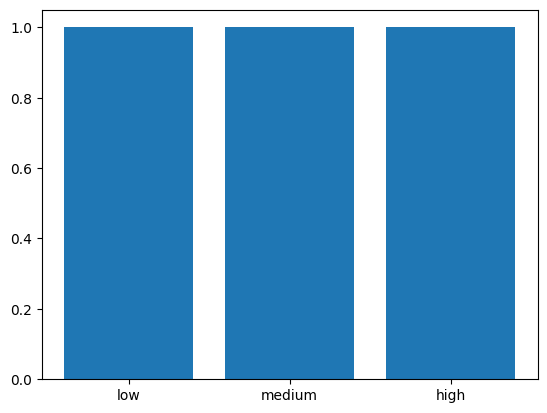

In [23]:
df
x=df['salary']
y=df['left']
plt.bar(x,y)

<Axes: xlabel='salary'>

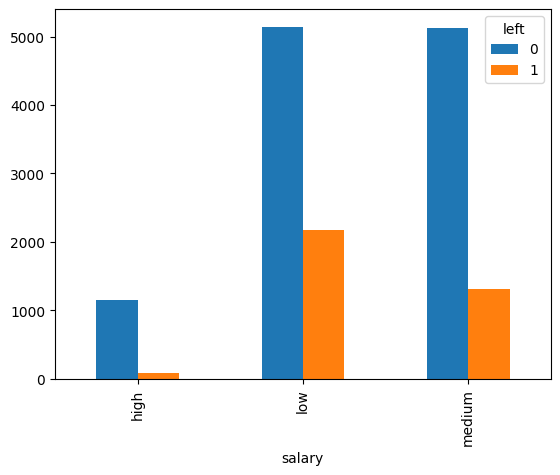

In [24]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [25]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [26]:
dummies=pd.get_dummies(subdf.salary)
dummies=dummies.astype(int)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [27]:
new_d=pd.concat([subdf,dummies],axis='columns')
new_df=new_d.drop(['salary'],axis='columns')
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [28]:
X=new_df
y=df['left']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
model.score(X_test, y_test)

0.7837777777777778